# Circuitos: operaciones con varios qubits

Recapitulemos. Hemos visto cómo: 

- se representa la información en un qubit [1](./l1.ipynb)
- se hacen operaciones con un qubit [2](./l2.ipynb)
- se representa la información con varios qubits [3](./l3.ipynb)

Siguiendo la secuencia lógica de la serie, ahora hay que ver cómo se hacen operaciones con varios qubits. Sin duda, te preguntarás por qué se este capítulo se llama "circuitos" y la razón es que si bien podemos entender las rotaciones de una flechita más o menos bien en nuestra cabeza, la cosa se haría prácticamente inabarcable cuando juntamos unos cuantos qubits y qué decir si necesitamos cientos o miles de ellos, cada uno con su flechita moviéndose como loca. Afortunadamente, los científicos brillantes consiguen encontrar maneras de atacar los problemas de manera que sean accesibles y en este caso se inventaron un modelo para que los humanos entiendan y expresen operaciones con muchos qubits. A este modelo lo llamaron **circuitos cuánticos** que ya los hemos visto por encima en capítulos anteriores y ahora vamos a explicarlos con más detalle.

## Circuitos cuánticos

Para entender qué es esto, imagínate una competición olímpica de natación:

![swim](./pics/swimlane.jpg)

Normalmente los nadadores se lanzan a la piscina, hacen unos cuantos largos y vuelven, seguramente más cansados, pero vuelven. Pues bien: ahora imagínate que en las calles de cada nadador ponemos cajas grandes tienen que atravesar buceando, como si fuesen pequeños túneles. El problema es que cuando un nadador entra en uno de estos túneles... sale cambiado. "Cambiado" no quiere decir "más cansado", sino esencialmente diferente, como si fuera otra persona... De hecho, muchas veces no vuelve el mismo nadador que salió, sino otra persona distinta que a lo mejor no sabe nadar. Esto sí que sería un deporte de riesgo.

Pues bien: traduciendo esta analogía al lenguaje de la computación cuántica, diremos que los nadadores son los ***qubits***, que la piscina es un ***circuito cuántico*** y que las cajas-túnel son ***puertas cuánticas***. 

Voy a crear un circuito cuántico mediante el lenguaje de programción Python y el paquete Qiskit. Igual que en las competiciones de natación, vamos a tener ocho nadadores o, mejor dicho, ocho qubits. Como siempre, si no sabes programar en Python, mira simplemente el dibujito

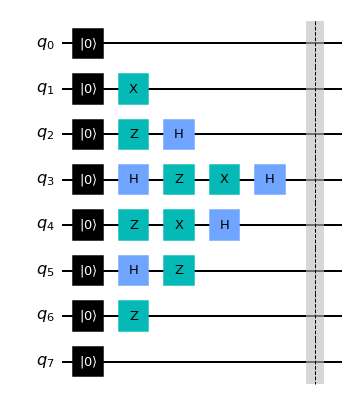

In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(8)

for i in range(8):
    circuit.reset(i)

circuit.x(1)

circuit.z(2)
circuit.h(2)

circuit.h(3)
circuit.z(3)
circuit.x(3)
circuit.h(3)

circuit.z(4)
circuit.x(4)
circuit.h(4)

circuit.h(5)
circuit.z(5)

circuit.z(6)

circuit.barrier()

circuit.draw()


Siguiendo con nuestra analogía, tenemos ocho nadadores se lanzan a la vez por la parte izquierda. Los que llevan la etiqueta $q0$ y $q7$ no se encuentran ningún obstáculo, pero los demás tienen que atravesar una serie de túneles. Cuando llegan a la meta, los del centro están irreconocibles, pues han buceado en el interior de tres o cuatro túneles que los han transformado, pero los extremos no han cambiado nada.

En realidad, aquí vemos a nuestros ocho qubits que al principio están en estado $\ket{0}$ y decimos que recorren el camino de las líneas horizontales hasta llegar hasta la franja gris de la derecha. Los del centro vivirán más aventuras que los de los extremos, pues tienen que atravesar una serie de puertas lógicas, las que vimos hace dos capítulos, que son esas cajas verdes y azules con las letras $H X Z$.

Gracias a Python y a Qiskit podemos saber rápidamente cómo llegan nuestros qubits al lado derecho:

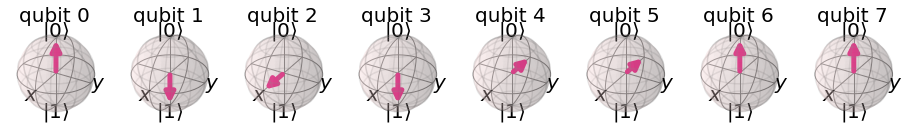

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state)

Como preveíamos, los del centro han cambiado bastante. 

El resultado al final del circuito también lo podíamos haber escrito con expresiones matemáticas:

$$
\begin{aligned}
\ket 0  = \ket{q_0} 
\newline
X \cdot \ket 0 = \ket{q_1} 
\newline
H \cdot Z \cdot  \ket 0 = \ket{q_2} 
\newline
H \cdot X \cdot Z \cdot H \cdot  \ket 0 = \ket{q_3} 
\newline
H \cdot X \cdot Z \cdot  \ket 0 = \ket{q_4} 
\newline
Z\cdot H \cdot  \ket 0 = \ket{q_5} 
\newline
 Z \cdot \ket 0 = \ket{q_6} 
\newline
\ket 0 = \ket{q_7} 
\end {aligned}
$$

Observa que las transformaciones $H X Z$ aparecen en el orden inverso respecto al dibujo. Acostúmbrate: no será la primera vez que en computación cuántica las cosas se representan al revés... las matemáticas son así. Para que sea más fácil de interpretar, lo he alienado de manera que leyendo de derecha a izquierda se entienda mejor.

Si aplicas las transformaciones una tras otra a cada qubit, partiendo de $\ket{0}$, llegarás a esto:


$\ket{q_0} = \ket 0$ 

$\ket{q_1} = \ket 1 $

$\ket{q_2} = \frac{1}{\sqrt 2} \ket{0} + \frac{1}{\sqrt 2} \ket{1} $

$\ket{q_3} = - \ket{1} $

$\ket{q_4} = \frac{1}{\sqrt 2} \ket{0} - \frac{1}{\sqrt 2} \ket{1} $

$\ket{q_5} = \frac{1}{\sqrt 2} \ket{0} - \frac{1}{\sqrt 2} \ket{1}  $

$\ket{q_6} = \ket 0 $

$\ket{q_7} = \ket 0 $


Si te fijas, los valores matemáticos se corresponden con la posición en las esferas. No obstante, te habrás dado cuenta que el signo $-$ de  $\ket{q_3}$ no se nota en el dibujo de la esfera. Muy cierto: es una de las limitaciones de la esfera de Bloch. El signo de ese estado no se puede reconocer.

Te preguntarás si es posible juntar todos los ocho qubits generando un estado combinado y, efectivamente, es posible. Sería una cosa así: $\ket{q_0 q_1 q_2 q_3 q_4 q_5 q_6 q_7}$. El problemilla es que si desarrollamos esta expresión de forma matricial nos va a salir algo muy grande. No obstante, hoy me siento generoso y le voy a pedir a Qiskit que lo escriba por mi haciendo uso de lo que se conoce como "vector de estado" (Statevector). Lo voy a escribir de manera horizontal para que se vea mejor: 

In [3]:
from qiskit.visualization import array_to_latex

array_to_latex(state, prefix="\\text{Estado combinado} = ", max_size=256)

<IPython.core.display.Latex object>

Por último, a lo mejor te preguntas si es posible obtener una matriz global, llamémosla $G$, que represente a toda la transformación del circuito y así no tener que hacer transformaciones individuales de cada qubit. Si así fuera, podríamos escribir $G \cdot \ket{q_0 q_1 q_2 q_3 q_4 q_5 q_6 q_7}$ y la expresión quedaría bastante limpia. Pues bien, esa matriz sí existe y se puede hallar pero es tan grande que todos mis intentos de mostrarla en este documento me llevarían a generar más confusión que claridad. 

Simplemente quédate con la idea de que a partir de unos pocos qubits, hay que renunciar a este tipo de representaciones inabarcables y trabajar de otra manera. Lo que estamos viendo nos sirve muy bien para aprender cómo funcionan los qubits, para comprender su enorme potencia de cálculo y para entender por qúe hay que buscar vías alternativas para manejar todas las posibilidades. 

## La puerta CNOT

Mucho más importante que expresiones matemáticas farragosas es lo que se llama la puerta ***CNOT***. Se trata de una transformación muy sencilla que se aplica a dos qubits y, afortunadamente, es perfectamente abarcable. Digo afortunadamente porque es tan sencilla como importante. Si te dedicas a la computación cuántica, seguro que vas a ver puertas CNOT todos los días.

Si recuerdas, decíamos que la puerta $X$ es la que siempre lleva la contraria. En la vida real, un comportamiento sistemático tan impertinente puede llevar al aislamiento social así que la puerta $CNOT$, que no se quiere sentir discriminada, pero a la vez también le gusta llevar la contraria, decide preguntar a un qubit adicional que actúa como consultor antes de cambiar el estado de su "víctima". Así pues, la puerta $CNOT$ toma dos qubits como entrada y produce otros dos en la salida. El primero de ellos es el llamado qubit de **control** (para no ofender a los consultores) y el segundo es el **objetivo** (que es un nombre algo más simpático que *víctima*). Es muy sencillo entender comportamiento de la puerta $CNOT$ para los estados fundamentales, solo son tres reglas:
- al qubit de control, no lo toques, solo pregúntale en qué estado está y nunca lo cambies
- si el control dice que está en estado $\ket{0}$ el objetivo se queda como estaba
- si el control dice que está en estado $\ket{1}$ el objetivo se invierte (igual que hacía $X$)
 
Estas reglas, en forma de tabla son así:

$$
\def\arraystretch{1.5}
   \begin{array}{c:c:c:c:c}
   control_{entrada} & objetivo_{entrada} & &  control_{salida} &  objetivo_{salida} \\ \hline
   0 & 0 & & 0 & \color{green} 0 \\
   \hdashline
   0 & 1 & & 0 & \color{green} 1 \\
   \hdashline
   1 & 0 & & 1 & \color{red} 1 \\
   \hdashline
   1 & 1 & & 1 & \color{red}  0 
\end{array}

$$

Observa que me he ahorrado los *kets* por comodidad pero he marcado en verde la salida del objetivo cuando queda inalterado, y en rojo cuando la puerta ha forzado el cambio.

Vamos a pedirle a Qiskit que nos represente una puerta CNOT:

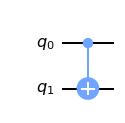

In [4]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

Como verás, tenemos dos qubits $q0 , q1$ y ya no aparece ninguna "cajita" sino un punto gordo en $q0$ (el control) y un signo $\bigoplus$ en $q1$ (el objetivo). Esta es la forma de representar la puerta $CNOT$.

Ahora vamos a pedirle a Qiskit que nos represente la matriz de transformación de la puerta CNOT.

In [15]:
from qiskit import QuantumCircuit, Aer, assemble

simulador = Aer.get_backend('unitary_simulator')
objeto = assemble(qc.reverse_bits())
matriz = simulador.run(objeto).result().get_unitary()

array_to_latex(matriz, prefix="\\text{CNOT = } ")

<IPython.core.display.Latex object>

Con lo que hemos visto bastaría para saber lo que es una puerta $CNOT$ y podríamos seguir adelante pero quizás tengas curiosidad acerca de cómo se representa esto matemáticamente, sobre todo por que dijimos que esta puerta es abarcable. 

Primero vamos a escribir cómo opera $CNOT$ en los estados fundamentales:

$ CNOT \cdot \ket{00} = \ket{00} $

$ CNOT \cdot \ket{01} = \ket{10} $

$ CNOT \cdot \ket{10} = \ket{11} $

$ CNOT \cdot \ket{11} = \ket{10} $

Nos podemos permitir escribir esto mismo con matrices:

$$
CNOT \cdot \ket{00} 
=
\left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 
                           0 & 1 & 0 & 0 \\
                           0 & 0 & 0 & 1 \\
                           0 & 0 & 1 & 0 \\
\end{array} \right] 
\cdot
\left[ \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right] 
=
\left[ \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right] 
= 
\ket{00}
$$

$$
CNOT \cdot \ket{01} 
=
\left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 
                           0 & 1 & 0 & 0 \\
                           0 & 0 & 0 & 1 \\
                           0 & 0 & 1 & 0 \\
\end{array} \right] 
\cdot
\left[ \begin{array}{c} 0 \\ 1 \\ 0 \\ 0 \end{array} \right] 
=
\left[ \begin{array}{c} 0 \\ 1 \\ 0 \\ 0 \end{array} \right] 
= 
\ket{01}
$$

$$
CNOT \cdot \ket{10} 
=
\left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 
                           0 & 1 & 0 & 0 \\
                           0 & 0 & 0 & 1 \\
                           0 & 0 & 1 & 0 \\
\end{array} \right] 
\cdot
\left[ \begin{array}{c} 0 \\ 0 \\ 1 \\ 0 \end{array} \right] 
=
\left[ \begin{array}{c} 0 \\ 0 \\ 0 \\ \color{red} 1 \end{array} \right] 
= 
\ket{1\color{red}1}
$$

$$
CNOT \cdot \ket{11} 
=
\left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 
                           0 & 1 & 0 & 0 \\
                           0 & 0 & 0 & 1 \\
                           0 & 0 & 1 & 0 \\
\end{array} \right] 
\cdot
\left[ \begin{array}{c} 0 \\ 0 \\ 1 \\ 1 \end{array} \right] 
=
\left[ \begin{array}{c} 0 \\ 0 \\ 1 \\ \color{red} 0 \end{array} \right]
= 
\ket{1\color{red} 0} 
$$

De esta forma se ve el cambio tan pequeño que introduce $CNOT$, pero creéme que es muy importante y tiene una relevancia enorme. Por el momento piensa que hemos visto una transformación que dependiendo del estado de un qubit no cambia el estado del mismo, sino el de otro. De esta manera estamos creando una especie de dependencia o correlación que se va a ver mucho mejor en el apartado siguiente, cuando hablemos sobre el *entrelazamiento*.

## Qubits entrelazados

Sin dejar de lado nuestra conocida y estudiada puerta CNOT, ahora imaginate que nuestro consultor no nos da una respuesta clara, es decir: que el qubit de control no esta ni en $\ket0$ ni en $\ket1$ sino en algo a medio camino.  Si recuerdas, algo de esto ya lo vimos cuando hablamos de las operaciones con un qubit y presentamos a la puerta de Hadamard - el incordio.

Para que no tengas que ir hacia atrás, te lo escribo aquí de nuevo. Como siempre, con la ayuda de Qiskit:


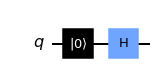

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

circuit = QuantumCircuit(1)

circuit.reset(0)
circuit.h(0)

circuit.draw()

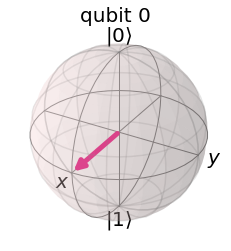

In [17]:
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state)

Recordemos entonces que:

$$
H \cdot \ket{0} 
= 
\frac{1}{\sqrt2} \cdot \left[ \begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array} \right] \cdot \left[ \begin{array}{c} 1 \\ 0 \end{array} \right] 
=
\left[ \begin{array}{c} \frac{1}{\sqrt 2} \\ \space \\ \frac{1}{\sqrt 2} \end{array} \right]
=
\frac{1}{\sqrt 2} \ket{0} + \frac{1}{\sqrt 2} \ket{1} = \ket{+} 
$$

y sobre ese estado final, abreviado $\ket{+}$ , decíamos que estaba en **maxima superposición**. Realmente, queríamos decir que no se decidía ni por el $\ket{0}$ ni por el $\ket{1}$ exactamente como una moneda.

Ahora nos preguntamos qué efecto tiene una puerta $CNOT$ con un consultor en estado de máxima superposición. Bueno, mejor se lo preguntamos a Qiskit, que para eso está:

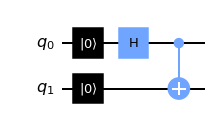

In [27]:
circuit = QuantumCircuit(2)

circuit.reset(0)
circuit.reset(1)
circuit.h(0)
circuit.cx(0,1)
circuit.draw()

En este circuito, representamos dos qubits $\ket{q_0}$ y $\ket{q_1}$, ambos inicializados a $\ket{0}$. Al primero, $\ket{q_0}$ lo hacemos pasar por una puerta $H$ con lo cual se nos convierte en $\frac{1}{\sqrt 2} \ket{0} + \frac{1}{\sqrt 2} \ket{1} $ (abreviando: $\ket{+}$) y luego lo tomamos como el qubit de control de una puerta $CNOT$ que añadimos a continuación.

El qubit $\ket{q_1}$ está en $\ket{0}$ y sabe muy bien lo que tiene que hacer: cuando vea un $\ket{1}$ en $\ket{q_0}$, alternará completamente su estado y si ve un $\ket{0}$ no hará nada. Su problema es que no es eso lo que está viendo. 

Cuando $\ket{q_1}$ mira hacia arriba para consultar a $\ket{q_0}$, está viendo un qubit que no se decide, en estado $\ket{+}$ que no es ni $\ket{0}$ ni $\ket{1}$, sino más bien como una moneda girando en el aire. Te preguntarás qué control puede ejercer $\ket{q_0}$ en este estado.

Puedes pensarlo así: $\ket{q_0}$ controla a $\ket{q_1}$ transmitiéndole su incertidumbre de tal manera que ambos quedan "enganchados" o, como dicen los físicos: ***entrelazados***. Digamos que $\ket{q_1}$, a pesar de haber tenido siempre las cosas muy claras, se vincula a la incertidumbre de su compañero, esperando eternamente hasta que se decida. Si empiezas a sospechar que esto del entrelazamiento es algo muy profundo has acertado. Se necesita bastante tiempo y muchos conocimientos para llegar a al fondo de lo que significa todo esto pero no te desanimes. En el capítulo siguiente vas a ver cómo aplicar este conocimiento para entender algo sorprendente.

De momento, vamos a preguntar a las mátematicas cómo nos explican esto en su lenguaje tan críptico como preciso. Como siempre, Qiskit nos va a ayudar:



In [28]:


state = Statevector.from_instruction(circuit)
array_to_latex(state, prefix="\\text{Estado combinado} = ", max_size=256)

<IPython.core.display.Latex object>

o lo que es lo mismo:

$$
\frac{1}{\sqrt 2} \ket{00} + \frac{1}{\sqrt 2} \ket{11}
$$

De esta manera se expresa matemáticamente un entrelazamiento de dos qubits. Nada espectacular, nada que ver con la prosa pretenciosa, pero creéme que muchos científicos alucinaron el siglo pasado al ver expresiones de este tipo... y muchos científicos actuales también. Observa que dentro de los *kets* están los dos qubits, no sólo uno de ellos como en el estado $\ket{+}$.

Para seguir adelante y entender un poco más vamos a forzar la decisión de los qubits. Esto se hace en computación cuántica *midiendo* el estado de los qubits. Si recuerdas, cuando medimos un qubit siempre obtenemos el estado $\ket{0}$ o $\ket{1}$... y ahora ya no valen medias tintas. El qubit $\ket{q_1}$ seguro que se alegra enormemente, pues por fin va a saber qué hacer.

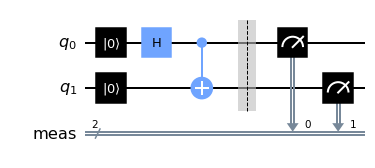

In [29]:
circuit.measure_all()
circuit.draw()

Como también vimos anteriormente, los dos relojes de la derecha servirían para medir el tiempo de cada nadador... mejor dicho el estado de cada qubit. El programita de abajo va a ejecutar  mil veces ese circuito y nos va a calcular la probabilidad de cada estado final. Mejor no te imagines cómo quedarían unos nadadores que repitieran una competición mil veces...

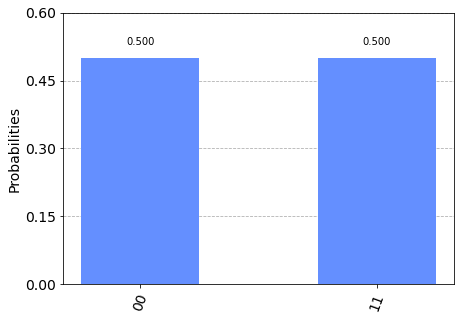

In [69]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

engine = BasicAer.get_backend('qasm_simulator')
outcome = execute(circuit, engine, shots=1000).result()
counts  = outcome.get_counts()
plot_histogram(counts)

Como nos dijeron las matemáticas:
- solo hay dos estados posibles $\ket{00}$ y $\ket{11}$ son los que se ven el eje horizontal, escritos de forma oblícua
- ambos tienen la misma probabilidad, igual que cuando tiramos una moneda

Piénsalo una vez más: en este caso, el qubit $q_1$ se vincula de tal manera a $q_0$ que se identifica totalmente con él: al medirlos siempre son iguales. Es como si olvidase por completo su identidad, como si alterase su comportamiento. Es como si el resultado de tirar una moneda influyese en otra moneda distinta. Hay otras variantes de esta propiedad, pero quédate solo con esto para empezar.

Lo que hemos visto es que con una puerta de dos qubits tan sencilla e insignificante como $CNOT$ que, en principio, solo tiene el efecto de cambiar el segundo qubit si el primero es $\ket0$, somos capaces de provocar cambios muy esenciales en el comportamiento de dos qubits. Ahora vamos a ver qué podemos conseguir con esto.

---

Capítulo siguiente: [Teleportación](./l5.ipynb)

Capítulo anterior: [Representando varios qubits](./l3.ipynb)

[Volver al índice](../README.md)